DATA CLEANING OF EMPLOYEE DATASET FROM DATA.GOV

1. Importing necessary libraries and Modules

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

2. Loading the dataset

In [8]:
data = pd.read_excel('DATA/Employee Sample Data1.xlsx')

3. Inspecting the dataset

In [11]:
## checking the dimentions of the dataset
data.shape

(1000, 14)

In [13]:
## Inspecting the top rows of the dataset

data.head(10)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT
5,E00644,Joshua Gupta,Account Representative,Sales,Corporate,Male,Asian,57,2017-01-24,50994,0.00,China,Chongqing,NaT
6,E01550,Ruby Barnes,Manager,IT,Corporate,Female,Caucasian,27,2020-07-01,119746,0.10,United States,Phoenix,NaT
7,E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25,2020-05-16,41336,0.00,United States,Miami,2021-05-20
8,E04533,Easton Bailey,Manager,Accounting,Manufacturing,Male,Caucasian,29,2019-01-25,113527,0.06,United States,Austin,NaT
9,E03838,Madeline Walker,Sr. Analyst,Finance,Speciality Products,Female,Caucasian,34,2018-06-13,77203,0.00,United States,Chicago,NaT


In [15]:
## Inspecting the last rows

data.tail(10)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
990,E01578,Anthony Hong,Sr. Manger,IT,Research & Development,Male,Asian,37,2010-11-29,146961,0.11,United States,Columbus,NaT
991,E03430,Leo Herrera,Sr. Business Partner,Human Resources,Research & Development,Male,Latino,48,1998-04-22,85369,0.00,Brazil,Manaus,2004-11-27
992,E03058,Robert Wright,Technical Architect,IT,Manufacturing,Male,Caucasian,30,2015-06-14,67489,0.00,United States,Chicago,NaT
993,E04762,Audrey Richardson,Director,IT,Manufacturing,Female,Caucasian,46,2018-10-06,166259,0.17,United States,Chicago,NaT
994,E01148,Scarlett Kumar,Systems Analyst,IT,Corporate,Female,Asian,55,2009-01-07,47032,0.00,United States,Columbus,NaT
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,2016-09-18,98427,0.00,United States,Columbus,NaT
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,2010-05-31,47387,0.00,China,Chengdu,2018-01-08
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,2019-06-10,176710,0.15,United States,Miami,NaT
998,E02521,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33,2012-01-28,95960,0.00,China,Chengdu,NaT
999,E03545,Sofia Cheng,Vice President,Accounting,Corporate,Female,Asian,63,2020-07-26,216195,0.31,United States,Miami,NaT


In [17]:
## dataset info summary

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      1000 non-null   object        
 2   Job Title      1000 non-null   object        
 3   Department     1000 non-null   object        
 4   Business Unit  1000 non-null   object        
 5   Gender         1000 non-null   object        
 6   Ethnicity      1000 non-null   object        
 7   Age            1000 non-null   int64         
 8   Hire Date      1000 non-null   datetime64[ns]
 9   Annual Salary  1000 non-null   int64         
 10  Bonus %        1000 non-null   float64       
 11  Country        1000 non-null   object        
 12  City           1000 non-null   object        
 13  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(9)
memory usage: 109.5

In [19]:
## Dataset statistical Summary

data.describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date
count,1000.000000,1000,1000.000000,1000.000000,85
mean,44.382000,2012-04-07 02:54:14.400000,113217.365000,0.088660,2016-11-02 18:04:14.117647104
min,25.000000,1992-01-09 00:00:00,40063.000000,0.000000,1994-12-18 00:00:00
25%,35.000000,2007-02-14 00:00:00,71430.250000,0.000000,2014-12-25 00:00:00
50%,45.000000,2014-02-15 12:00:00,96557.000000,0.000000,2019-05-23 00:00:00
75%,54.000000,2018-06-22 00:00:00,150782.250000,0.150000,2021-04-09 00:00:00
max,65.000000,2021-12-26 00:00:00,258498.000000,0.400000,2022-08-17 00:00:00
std,11.246981,NaN,53545.985644,0.117856,NaN


4. Data Cleaning and Preprocessing

A. Checking and replacing null

In [23]:
## checking and identifying null values

data.isna()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,True
998,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [25]:
data.isna().sum()

EEID               0
Full Name          0
Job Title          0
Department         0
Business Unit      0
Gender             0
Ethnicity          0
Age                0
Hire Date          0
Annual Salary      0
Bonus %            0
Country            0
City               0
Exit Date        915
dtype: int64

the null values in Exit date variable represent those still at the company

In [28]:
## Converting "Exit Date" data type from datetime to string to avoid issues with filling the null values

data['Exit Date'] = data['Exit Date'].astype('string')

In [32]:
data['Exit Date'].dtypes ## Confirming the data type change

string[python]

In [34]:
## Filling the null values with a place holder

data['Exit Date'] = data['Exit Date'].fillna('-')

In [36]:
data

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,-
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,-
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,-
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,2016-09-18,98427,0.00,United States,Columbus,-
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,2010-05-31,47387,0.00,China,Chengdu,2018-01-08
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,2019-06-10,176710,0.15,United States,Miami,-
998,E02521,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33,2012-01-28,95960,0.00,China,Chengdu,-


In [40]:
## Making columns easily readable

data.columns = data.columns.str.replace(' ', '_').str.strip()

In [42]:
data.head()

,EEID,Full_Name,Job_Title,Department,Business_Unit,Gender,Ethnicity,Age,Hire_Date,Annual_Salary,Bonus_%,Country,City,Exit_Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,-
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,-
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,-
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,-


B. Checking for Duplicates

In [46]:
## Checking for duplicates
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [48]:
data.duplicated().sum() ## False flag of no duplicates

0

In [50]:
data['EEID'].duplicated().sum() ## Further exploration

89

In [56]:
data['EEID'].duplicated().any()

True

In [62]:
## Dropping duplicates using the 'EEID' column
cln_data = data.drop_duplicates(['EEID'], inplace = True)

In [75]:
data.shape

(911, 14)

In [77]:
data.reset_index(drop = True)

,EEID,Full_Name,Job_Title,Department,Business_Unit,Gender,Ethnicity,Age,Hire_Date,Annual_Salary,Bonus_%,Country,City,Exit_Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,-
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,-
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,-
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,2016-09-18,98427,0.00,United States,Columbus,-
907,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,2010-05-31,47387,0.00,China,Chengdu,2018-01-08
908,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,2019-06-10,176710,0.15,United States,Miami,-
909,E02521,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33,2012-01-28,95960,0.00,China,Chengdu,-


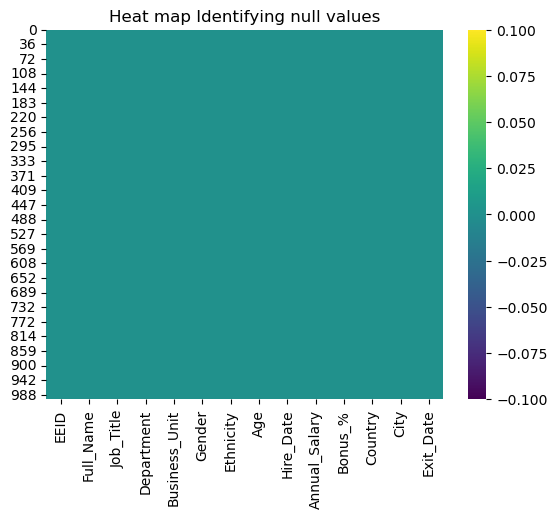

In [81]:
## Visualizing null values using a heatmap

sns.heatmap(data.isna(), cbar = True, cmap = 'viridis')
plt.title('Heat map Identifying null values')
plt.show()

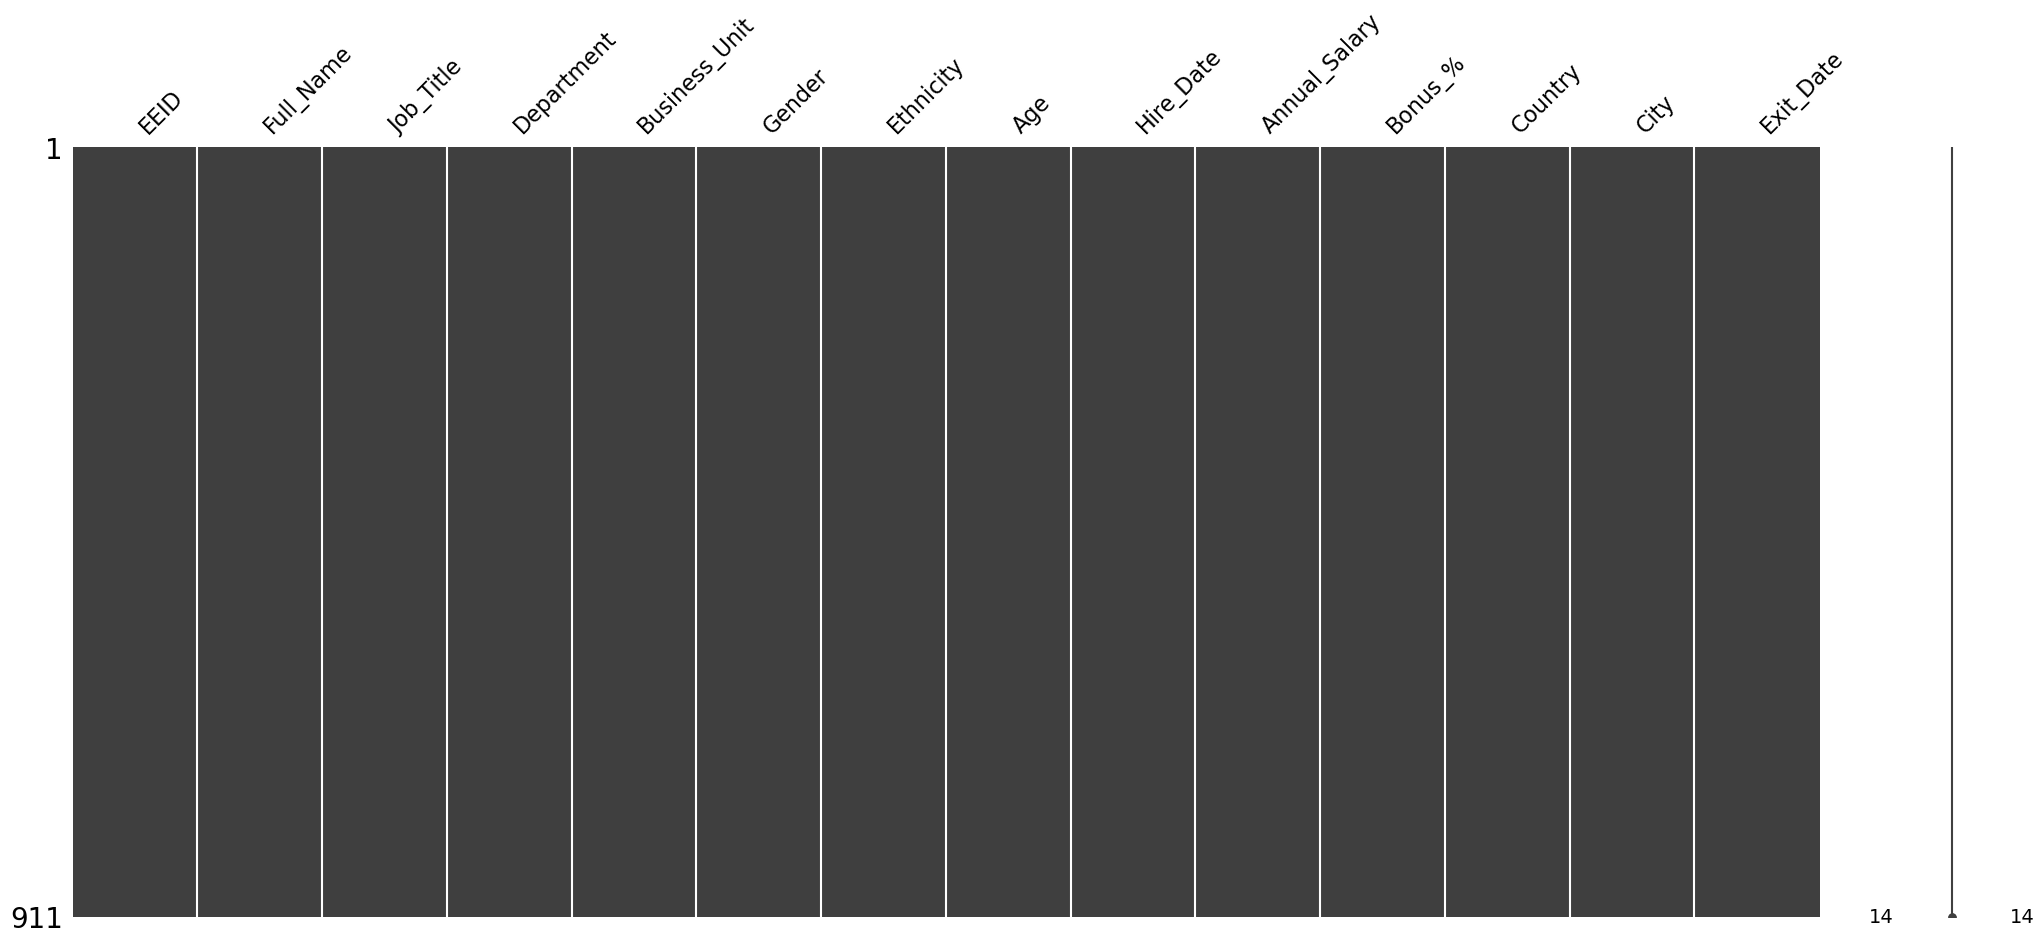

In [83]:
## Identing Missing values using Missingno library

msno.matrix(data)
plt.show()

The Dataset 

# 